In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\data science\python\Hackathon\dataframe_.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [3]:
df.shape

(1697, 2)

In [4]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [5]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [6]:
df1=df.dropna()
df1

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [7]:
df1.isnull().sum()

input     0
output    0
dtype: int64

In [8]:
df1.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
df1.shape

(1696, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

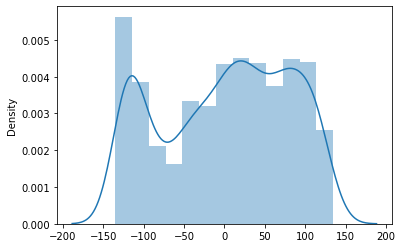

In [10]:
sns.distplot(df1[['input']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

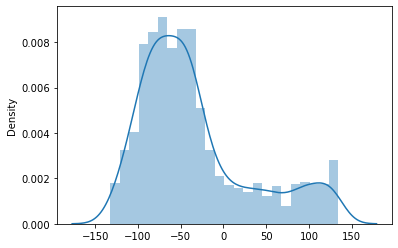

In [11]:
sns.distplot(df1[['output']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

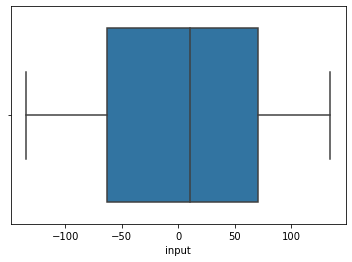

In [12]:
sns.boxplot(df1['input'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

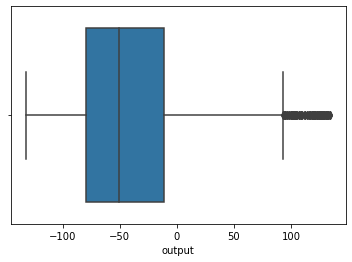

In [13]:
sns.boxplot(df1['output'])

In [14]:
df1.columns

Index(['input', 'output'], dtype='object')

### Identifying the Target Variable split "Train" and "Test" sets.

In [15]:
y=df1['output']
x=df1[['input']]

### Split into "Train" and "Test"
#### TrainSet Data preprocessing

In [16]:
import sklearn
print(sklearn.__version__)

0.24.2


In [17]:
from sklearn. model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=123)

In [18]:
x_train.head()

,input
1650,6.633331
1115,-129.894781
1652,6.105350
735,-51.366669
1000,73.633331


In [19]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1272, 1) (1272,)
(424, 1) (424,)


### Seperating Numerical and Categorical Features

In [20]:
x_train.head()

,input
1650,6.633331
1115,-129.894781
1652,6.105350
735,-51.366669
1000,73.633331


In [21]:
x_train_num=x_train.select_dtypes(include=["int64","float64"])
x_train_num

,input
1650,6.633331
1115,-129.894781
1652,6.105350
735,-51.366669
1000,73.633331
...,...
1122,-133.366669
1346,36.692021
1406,78.322987
1389,58.633331


In [22]:
x_train_cat=x_train.select_dtypes(include=["object"])
x_train_cat

""
1650
1115
1652
735
1000
...
1122
1346
1406
1389


### Scaling the numerical features for Train set

In [23]:
x_train_num.head()

,input
1650,6.633331
1115,-129.894781
1652,6.105350
735,-51.366669
1000,73.633331


In [24]:
from sklearn. preprocessing import StandardScaler
model = StandardScaler()
x_train_num_rescaled = pd.DataFrame(model.fit_transform(x_train_num),
                               columns = x_train_num.columns,
                               index = x_train_num.index)
x_train_num_rescaled.head()

,input
1650,0.046950
1115,-1.676574
1652,0.040285
735,-0.685239
1000,0.892755


### Applying OneHotEncoding for Categorical Features for Train set

In [25]:
x_train_cat.head()

""
1650
1115
1652
735
1000


In [26]:
from sklearn. preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
x_train_cat_ohe = pd.DataFrame(encoder.fit_transform(x_train_cat),
                               columns = encoder.get_feature_names(x_train_cat.columns),
                               index = x_train_cat.index)
x_train_cat_ohe

""
1650
1115
1652
735
1000
...
1122
1346
1406
1389


### Concating the the encoded Categorical Features and Rescaled Numerical Features

In [27]:
x_train_transformed=pd.concat([x_train_num_rescaled,x_train_cat_ohe], axis=1)
x_train_transformed

,input
1650,0.046950
1115,-1.676574
1652,0.040285
735,-0.685239
1000,0.892755
...,...
1122,-1.720403
1346,0.426410
1406,0.951957
1389,0.703396


### Test Set- Data preprocessing

In [28]:
x_test.head()

,input
1680,33.288135
585,44.812979
1169,-109.366669
1683,10.008175
327,112.659878


In [29]:
x_test_num=x_test.select_dtypes(include=["int64","float64"])
x_test_num.head()

,input
1680,33.288135
585,44.812979
1169,-109.366669
1683,10.008175
327,112.659878


In [30]:
x_test_cat=x_test.select_dtypes(include=["object"])
x_test_cat.head()

""
1680
585
1169
1683
327


In [31]:
x_test_num_rescaled = pd.DataFrame(model.transform(x_test_num),
                                  columns = x_test_num.columns,
                                  index = x_test_num.index)
x_test_num_rescaled.head()

,input
1680,0.383439
585,0.528928
1169,-1.417428
1683,0.089554
327,1.385424


In [32]:
from sklearn. preprocessing import OneHotEncoder
#encoder = OneHotEncoder(drop='first',sparse=False)
x_test_cat_ohe=pd.DataFrame(encoder.transform(x_test_cat),
                                columns=encoder.get_feature_names(x_test_cat.columns),
                                index=x_test_cat.index)
x_test_cat_ohe.head()

""
1680
585
1169
1683
327


In [33]:
x_test_transformed = pd.concat([x_test_num_rescaled,x_test_cat_ohe],axis=1)
x_test_transformed

,input
1680,0.383439
585,0.528928
1169,-1.417428
1683,0.089554
327,1.385424
...,...
141,-0.688297
408,1.006371
1094,-1.626218
246,0.387797


### Building the Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
lr=LinearRegression()

In [36]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)

In [37]:
model=lr.fit(transfromed_train,y_train)

In [38]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [39]:
predi=model.predict(transfromed_test)

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [41]:
mean_squared_error(y_test,predi)

2808.3497441184904

In [42]:
mean_absolute_error(y_test,predi)

39.76964994727187

In [43]:
r2_score(y_test,predi)

0.2604417192615056

In [44]:
model.coef_

array([34.24303996])

In [45]:
model.intercept_

-32.78353834496777

In [46]:
df1.duplicated(subset=df1.columns).sum()
df1.drop_duplicates(inplace=True,ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [47]:
df1['inputsquare']=df1['input']**2
df1

C:\Users\arun\AppData\Local\Temp/ipykernel_19392/3675497515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['inputsquare']=df1['input']**2


,input,output,inputsquare
0,-122.740667,-130.572085,15065.271434
1,-121.531419,-129.938929,14769.885901
2,-134.917019,-130.141832,18202.602016
3,-120.605951,-125.760932,14545.795441
4,-129.894781,-112.785214,16872.654053
...,...,...,...
1085,-112.018496,121.096397,12548.143513
1086,-119.954237,123.609122,14389.019022
1087,-109.942155,127.197394,12087.277402
1088,-111.515368,128.170885,12435.677389


In [48]:
y=df1[['input','inputsquare']]
x=df1[['output']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [49]:
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)

In [50]:
model=lr.fit(transfromed_train,y_train)

In [51]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [52]:
predi=model.predict(transfromed_test)

In [53]:
mean_squared_error(y_test,predi)

9602851.876368582

In [54]:
mean_absolute_error(y_test,predi)

1774.2835190616563

In [55]:
r2_score(y_test,predi)

0.21096740906997902

In [56]:
model.coef_

array([[  42.85715101],
       [2813.70474617]])

In [57]:
model.intercept_

array([   9.42842504, 6394.82565446])

In [58]:
df1['inputcube']=df1['input']**3
cl=df1[['input','inputcube','inputsquare']]
fv=df1[['output']]
x_train,x_test,y_train,y_test=train_test_split(y,x,train_size=0.8)
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)
model=lr.fit(transfromed_train,y_train)
lr.get_params()

C:\Users\arun\AppData\Local\Temp/ipykernel_19392/991692572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['inputcube']=df1['input']**3


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [59]:
predi=model.predict(transfromed_test)
mean_squared_error(y_test,predi)

2248.4523947607604

In [60]:
mean_absolute_error(y_test,predi)

34.50233145821249

In [61]:
r2_score(y_test,predi)

0.5581646796255064

### PolynomialFeatures

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly_features = PolynomialFeatures(degree=7)
new= df1[["input"]]
new_poly = poly_features.fit_transform(new)

In [64]:
new_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
        -2.78575169e+10,  3.41925021e+12, -4.19681053e+14],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
        -2.65120220e+10,  3.22204366e+12, -3.91579539e+14],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
        -4.47026927e+10,  6.03115404e+12, -8.13705325e+14],
       ...,
       [ 1.00000000e+00, -1.09942155e+02,  1.20872774e+04, ...,
        -1.60627989e+10,  1.76597873e+12, -1.94155507e+14],
       [ 1.00000000e+00, -1.11515368e+02,  1.24356774e+04, ...,
        -1.72454137e+10,  1.92312866e+12, -2.14458401e+14],
       [ 1.00000000e+00, -1.10344221e+02,  1.21758472e+04, ...,
        -1.63586693e+10,  1.80508463e+12, -1.99180658e+14]])

In [65]:
scaler = StandardScaler()
new_norm = scaler.fit_transform(new_poly)

In [66]:
new_norm

array([[ 0.        , -1.66203185,  1.5981244 , ..., -2.04389419,
         1.8343436 , -2.00714939],
       [ 0.        , -1.64667302,  1.54448397, ..., -1.94354612,
         1.69094386, -1.8687898 ],
       [ 0.        , -1.81668546,  2.16784681, ..., -3.30022066,
         3.73360265, -3.94715307],
       ...,
       [ 0.        , -1.49947609,  1.05733665, ..., -1.16423485,
         0.6321589 , -0.89675996],
       [ 0.        , -1.5194577 ,  1.12060422, ..., -1.25243519,
         0.74643127, -0.99672256],
       [ 0.        , -1.50458279,  1.07342045, ..., -1.18630109,
         0.66059495, -0.92150161]])

In [67]:
y = df1["output"]
x_train, x_test, y_train, y_test = train_test_split(new_norm, y, test_size=0.2)

In [68]:
model = LinearRegression().fit(x_train, y_train)

In [69]:
y_pred = model.predict(x_test)

In [70]:
model.fit(x_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)

In [72]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [73]:
mse

1134.6749790975819

In [74]:
r2

0.7398429412271175

### KNN regression

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [85]:
x_train,x_test,y_train,y_test = train_test_split(fv,cl,train_size=0.8,random_state=1)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)

In [88]:
knn=KNeighborsRegressor()

In [89]:
knn.fit(transfromed_train,y_train)

KNeighborsRegressor()

In [90]:
knn.score(transfromed_train,y_train)

0.5478210811466666

In [91]:
knn.score(transfromed_test,y_test)

0.22482668616876503